In [0]:
import csv
import pandas as pd
import nltk
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Laboratório 03: Tokenização e Stemming

# Questão 1

Tendo em vista os dados coletados no laboratório 01, fiz uso do tokenizador disponível na biblioteca nltk, a partir do RegexpTokenizer, que suporta o uso de uma expressão regular para tokenizar as palavras. Houve também o tratamento de letras maiúsculas e minúsculas, além da retirada de palavras sem sentido através do conjunto 'stopwords' dentro da biblioteca nltk.

In [0]:
colecao = pd.read_csv('https://raw.githubusercontent.com/LDVictor/ri_lab_01/master/output/results.csv')
colecao = colecao.astype(str)

In [0]:
palavras = []
palavras_filtradas = []

tokenizador = RegexpTokenizer(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})')
stpw = nltk.corpus.stopwords.words('portuguese')

for texto in colecao.texto:
  plvrs = [palavra for palavra in tokenizador.tokenize(texto.lower())
           if len(palavra) >= 3 and not bool(re.search(r'\d', palavra))]
  palavras.extend(plvrs)
  
for palavra in palavras:
  if palavra not in stpw:
    palavras_filtradas.append(palavra)
    
qte_palavras = len(palavras)
qte_palavras_filtradas = len(palavras_filtradas)
  
print("Sem filtragem =", qte_palavras)
print("Com filtragem =", qte_palavras_filtradas)

Sem filtragem = 107188
Com filtragem = 83618


# Questão 2

In [0]:
freq_ocorrencias = collections.Counter(palavras_filtradas)
total_palavras = len(palavras_filtradas)

rank50 = sorted(freq_ocorrencias.items(), key=lambda x: x[1], reverse=True)
ranking = 1

tabela_q2 = pd.DataFrame(columns=['Palavra', 'Frequencia', 'r', 'Pr(%)', 'r.Pr'])
tabela_q2['Palavra'] = [palavra[0] for palavra in rank50]
tabela_q2['Frequencia'] = [palavra[1] for palavra in rank50]
tabela_q2['r'] = [r+1 for r in range(0, len(rank50))]
tabela_q2['Pr(%)'] = [round((palavra[1] / total_palavras)*100, 2) for palavra in rank50]
tabela_q2['r.Pr'] = round((tabela_q2['Pr(%)']/100)*tabela_q2['r'], 3)

tabela_q2.head(50)

,Palavra,Frequencia,r,Pr(%),r.Pr
0,presidente,480,1,0.57,0.006
1,bolsonaro,464,2,0.55,0.011
2,governo,448,3,0.54,0.016
3,anos,423,4,0.51,0.020
4,ser,361,5,0.43,0.022
5,país,352,6,0.42,0.025
6,sobre,327,7,0.39,0.027
7,brasil,306,8,0.37,0.030
8,ainda,267,9,0.32,0.029
9,contra,266,10,0.32,0.032


# Questão 3

In [0]:
palavras_stemmadas = []
stemming = nltk.stem.SnowballStemmer('portuguese')

for palavra in palavras_filtradas:
  p = stemming.stem(palavra)
  palavras_stemmadas.append(p)
  
set_stemming = (sorted(set(palavras_stemmadas)))
set_normal = (sorted(set(palavras)))

print ("Tamanho do vocabulário sem stemming =", len(set_normal))
print ("Tamanho do vocabulário com stemming =", len(set_stemming))

Tamanho do vocabulário sem stemming = 15977
Tamanho do vocabulário com stemming = 8395


Falsos positivos: 

*   abram - abrangem -> abra
*   quarto - quartéis -> quart
*   estimou - estimula -> estim
*   sala - sal -> sal
*   fogo - fogem -> fog
*   maia - maio -> mai
*   falar - falir -> fal
*   lei - leia -> lei
*   ter - terça - terço -> ter
*   cano - canal -> can

Falsos negativos: 

*   acolh - acolhedor
*   correçã - correçõ
*   infant - infantil
*   infecc - infecçã
*   pso - psol
*   publicitár - publicitári
*   neutr - neutral
*   municip - municipal
*   institucional - institucionaliz
*   inform - informal

Ao realizar as consultas, os erros de overstemming (falso positivo) e understemming (falso negativo) irão gerar resultados não esperados em algumas consultas que usem palavras-chave que se encaixam nesses casos. Por exemplo, ao consultar a palavra "maia", em busca de pessoas com o sobrenome Maia, haveria resultados relacionados ao mês de maio por conta do falso positivo mostrado acima.


# Questão 4

In [0]:
freq_ocorrencias_q4 = collections.Counter(palavras_stemmadas)
total_palavras_q4 = len(palavras_stemmadas)

rank50 = sorted(freq_ocorrencias_q4.items(), key=lambda x: x[1], reverse=True)
ranking = 1

tabela_q4 = pd.DataFrame(columns=['Palavra', 'Frequencia', 'r', 'Pr(%)', 'r.Pr'])
tabela_q4['Palavra'] = [palavra[0] for palavra in rank50]
tabela_q4['Frequencia'] = [palavra[1] for palavra in rank50]
tabela_q4['r'] = [r+1 for r in range(0, len(rank50))]
tabela_q4['Pr(%)'] = [round((palavra[1] / total_palavras_q4)*100, 2) for palavra in rank50]
tabela_q4['r.Pr'] = round((tabela_q4['Pr(%)']/100)*tabela_q4['r'], 3)

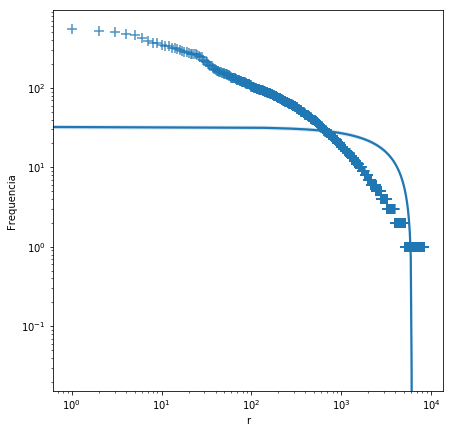

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequencia", tabela_q4, ax=ax, marker="+", scatter_kws={"s": 100})

Comparando esse gráfico com o do laboratório anterior, é perceptível uma certa linearidade na disposição de como os tokens estão apresentados. Este fato pode ser explicado devido a maior concentração da informação, já que agora há o agrupamento de palavras a partir de seus radicais via stemming.

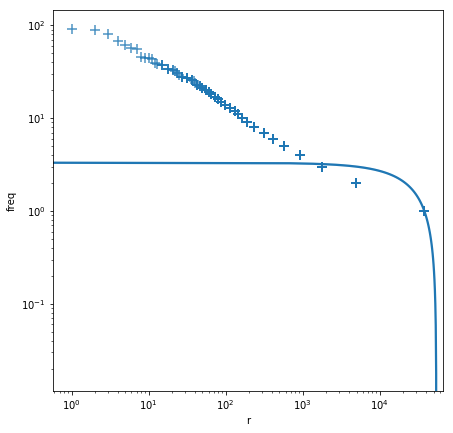

In [0]:
bigrams = []
bigrams = nltk.bigrams(palavras_stemmadas)
frequencia_bigrams = nltk.FreqDist(bigrams)

dados_q4 = pd.DataFrame(frequencia_bigrams.most_common(), columns=['word', 'freq'])
dados_q4['r'] = dados_q4['freq'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", dados_q4, ax=ax, marker="+", scatter_kws={"s": 100})

Já neste segundo gráfico, mesmo comparando o mesmo com o gráfico do laboratório anterior, não é possível notar uma grande diferença na disposição dos tokens nele, apenas uma diminuição na quantidade de elementos representados.